### Heart Disease Prediction Project : A Machine Learning Aproach
#### BY: Salman Zainab Adebisi

#### 1. Project Overview
**Objective:**
Heart disease remains one of the leading causes of death globally. The goal of this project is to develop a Machine Learning model capable of predicting the presence of heart disease in patients based on their medical history and biological markers.

**Medical Relevance:**
Early diagnosis is crucial for effective treatment. By analyzing physiological data—such as chest pain type, cholesterol levels, and exercise-induced angina, we aim to identify high-risk patients. This tool is intended to assist, not replace, healthcare professionals by flagging patients who may require further cardiac assessment.

#### 2. Data Dictionary
The dataset consists of 303 patient records with 14 clinical features. Understanding these features is key to our analysis:

| Feature | Description | Medical Significance |
| :--- | :--- | :--- |
| **age** | Age in years | Risk generally increases with age. |
| **sex** | 1 = Male, 0 = Female | Men and women often present different risk profiles. |
| **cp** | Chest Pain Type (0-3) | **0:** Typical Angina, **1:** Atypical Angina, **2:** Non-anginal, **3:** Asymptomatic. *Note: Asymptomatic pain can be the most dangerous.* |
| **trestbps** | Resting Blood Pressure (mm Hg) | High BP puts strain on the heart. |
| **chol** | Serum Cholesterol (mg/dl) | High LDL/cholesterol can clog arteries. |
| **fbs** | Fasting Blood Sugar > 120 mg/dl | 1 = True (Diabetic tendency), 0 = False. |
| **restecg** | Resting ECG Results | 0 = Normal, 1 = ST-T wave abnormality, 2 = Left Ventricular Hypertrophy. |
| **thalach** | Max Heart Rate Achieved | The heart's ability to handle stress. |
| **exang** | Exercise Induced Angina | 1 = Yes, 0 = No. Pain during exercise is a strong warning sign. |
| **oldpeak** | ST Depression induced by exercise | Indicates how the heart recovers after stress. |
| **slope** | Slope of peak exercise ST segment | 0 = Upsloping, 1 = Flat, 2 = Downsloping. |
| **ca** | Number of major vessels (0-3) | Colored by fluoroscopy. More blocked vessels = higher risk. |
| **thal** | Thalassemia | Blood disorder (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect). |
| **target** | Diagnosis | **0:** Healthy, **1:** Heart Disease Present. |

### 1. Importing Neccesssary Libraries

In [28]:
# 1. Import Essential Libraries
import pandas as pd     # For reading and manipulating the medical records
import numpy as np      # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns   # For making graphs look professional

# 2. Configure Visualization Settings
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 3. Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



print("Libraries Imported Successfully!")

Libraries Imported Successfully!


### 2. Loading The Data

In [6]:
# Load the dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\Heart_disease_cleveland_new.csv")

# Display the first 5 rows to verify the data structure
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## 3. Exploratory Data Analysis (EDA)
### Data Inspection
Before diving into complex visualizations, we perform a "Sanity Check" on the data.
* **Missing Values:** We check if any patient records are incomplete.
* **Statistical Summary:** We look for outliers (e.g., a cholesterol level of 0 or 600) that could distort the model.

In [7]:
#inspecting the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#checking the rows and columns in the data
df.shape

(303, 14)

In [10]:
#Checking for missing values

print("--- Missing Values ---")
print(df.isnull().sum())

--- Missing Values ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**The data has no missing values**

In [11]:
#checking for the Statistical Summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


#### Target Variable Distribution
We need to verify if our dataset is balanced.
* **0 = Healthy**
* **1 = Heart Disease**

**Why this matters:**
If 90% of our patients are healthy, the model could achieve 90% accuracy by simply predicting "Healthy" for everyone.But it would be useless for finding sick patients. Ideally, we want a roughly 50/50 split.

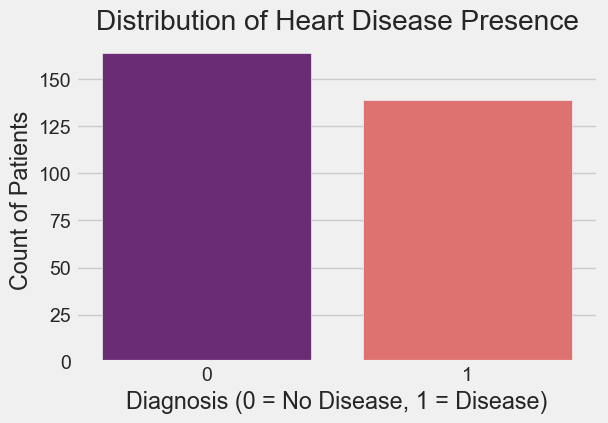

In [19]:
# plotting the graph of healthy and diseased heart
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='magma')

# Adding labels
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Diagnosis (0 = No Disease, 1 = Disease)')
plt.ylabel('Count of Patients')

plt.show()

In [17]:
# Calculating the exact percentages of healthy and diseased heart
count_disease = len(df[df.target == 1])
count_healthy = len(df[df.target == 0])
print(f"Percentage of Patients with Heart Disease: {(count_disease / len(df)) * 100:.2f}%")
print(f"Percentage of Healthy Patients: {(count_healthy / len(df)) * 100:.2f}%")

Percentage of Patients with Heart Disease: 45.87%
Percentage of Healthy Patients: 54.13%


#### Correlation Matrix
We calculate the correlation between all medical features to understand their relationships.
* **Positive Correlation (Red):** When one variable increases, the other increases.
* **Negative Correlation (Blue):** When one variable increases, the other decreases.

**Key thing to look for:**
Look at the bottom row (`target`). Which columns are **Red** (Risk Factors) and which are **Blue** (Protective Factors)?

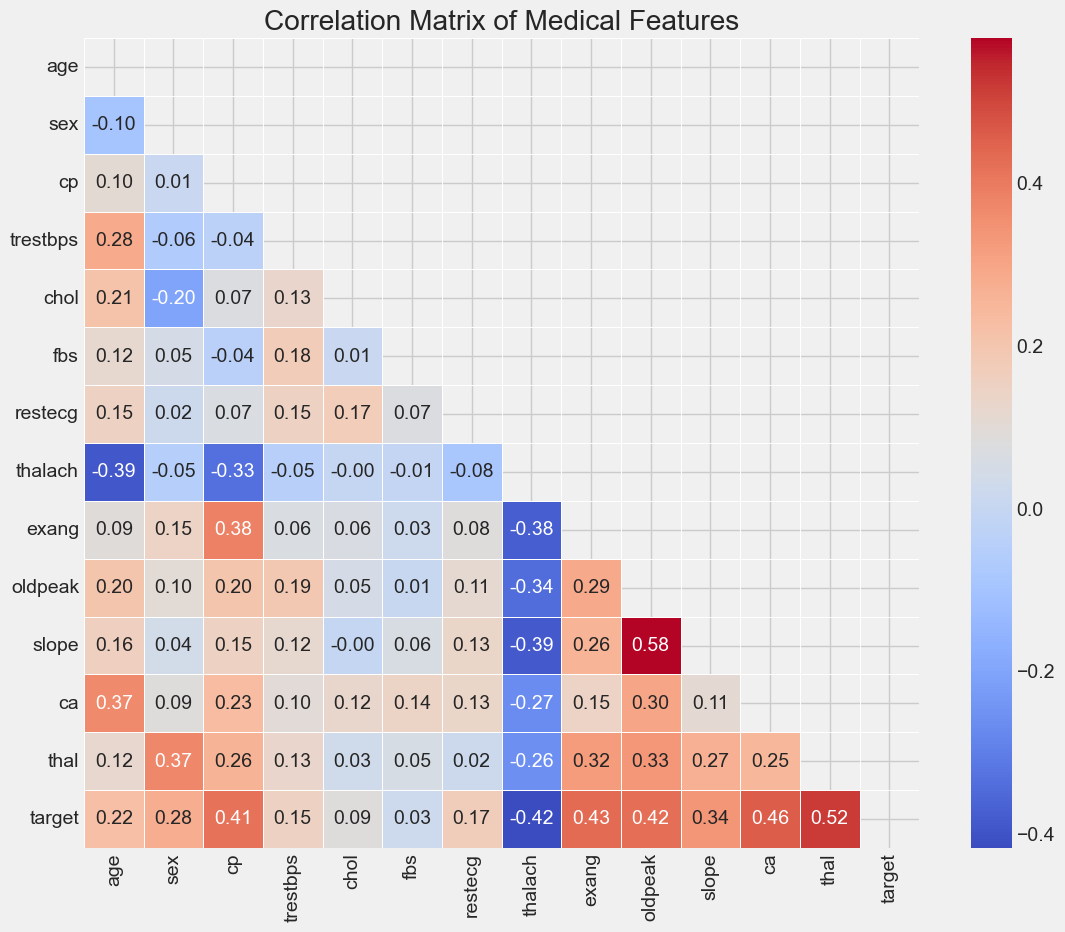

In [21]:
# Create a correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Medical Features')
plt.show()

#### Biological Risk Factors

**1. Age Analysis:**
Does heart disease only affect the elderly? We compare the age distribution of healthy vs. sick patients.

**2. Chest Pain (CP) Analysis:**
The dataset has 4 types of chest pain:
* **0: Typical Angina**
* **1: Atypical Angina**
* **2: Non-Anginal Pain**
* **3: Asymptomatic**
*Note: In many medical studies, "Asymptomatic" patients (Type 3) often have the silent, dangerous type of heart disease.*

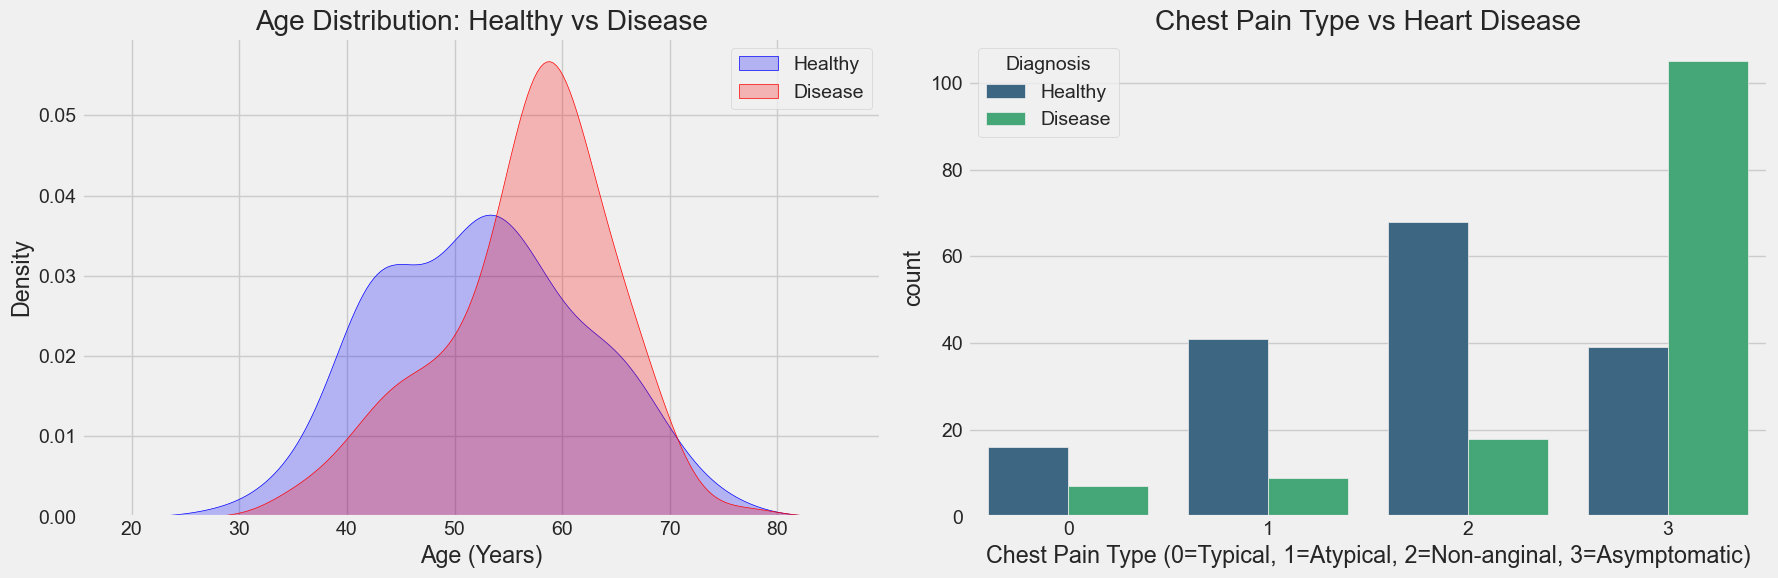

In [24]:
# Creating a figure with 2 subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot 1: Age Distribution ---
# using a KDE plot (smooth curve) to see the shift in age
sns.kdeplot(data=df[df['target'] == 0], x='age', fill=True, color='blue', label='Healthy', ax=axes[0])
sns.kdeplot(data=df[df['target'] == 1], x='age', fill=True, color='red', label='Disease', ax=axes[0])
axes[0].set_title('Age Distribution: Healthy vs Disease')
axes[0].set_xlabel('Age (Years)')
axes[0].legend()

# --- Plot 2: Chest Pain Analysis ---
# using a countplot to see which pain type has the most sick patients
sns.countplot(x='cp', hue='target', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Chest Pain Type vs Heart Disease')
axes[1].set_xlabel('Chest Pain Type (0=Typical, 1=Atypical, 2=Non-anginal, 3=Asymptomatic)')
axes[1].legend(title='Diagnosis', labels=['Healthy', 'Disease'])

plt.tight_layout()
plt.show()

#### Analysis of EDA Findings

**1. Chest Pain Analysis (The "Silent Killer"):**
The graph reveals a counter-intuitive but medically critical finding regarding Chest Pain types:
* **Highest Risk:** Patients with **Type 3 (Asymptomatic)** chest pain have the highest incidence of heart disease (105 diseased vs. 39 healthy).
* **Lowest Risk:** Patients with **Type 1 (Atypical Angina)** and **Type 2 (Non-Anginal Pain)** are significantly more likely to be healthy.
* **Medical Insight:** This confirms the danger of **Silent Ischemia**. Patients who report "no pain" (Asymptomatic) often do not seek early help, leading to advanced disease progression by the time they are diagnosed. This feature is the strongest predictor in our dataset.

**2. Age Analysis:**
* **General Trend:** As expected, the risk of heart disease increases with age. The distribution for "Disease" (Red curve) is shifted to the right compared to "Healthy" (Blue curve).
* **The Tipping Point:** The data shows that patients in the **60-70 age range** are at the highest risk, with disease cases outnumbering healthy cases.
* **Younger Patients:** Patients under 40 are largely healthy, though not immune.

### Data Preprocessing
#### One-Hot Encoding (Handling Categorical Data)
Machine Learning models interpret numbers as magnitudes.
* **The Problem:** The variable `cp` (Chest Pain) has values 0, 1, 2, 3. The model might incorrectly assume that Type 3 is "3x worse" than Type 1. This is wrong; they are just different *types* of pain.
* **The Solution:** We use **One-Hot Encoding** to create separate "Yes/No" columns for each type (e.g., `cp_0`, `cp_1`, `cp_2`, `cp_3`).

We will apply this to `cp` (Chest Pain), `thal` (Thalassemia), and `slope` (ST Slope).

In [25]:
# Defining the columns that are categorical (not just numbers, but categories)
categorical_cols = ['cp', 'thal', 'slope']

# 2. Applying get_dummies (One-Hot Encoding)
# This creates new binary columns and drops the original ones
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Checking the new columns
print("New Columns created:")
print(df_encoded.columns)
df_encoded.head()

New Columns created:
Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'thal_2', 'thal_3',
       'slope_1', 'slope_2'],
      dtype='object')


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,2,150,0,2.3,0,0,False,False,False,True,False,False,True
1,67,1,160,286,0,2,108,1,1.5,3,1,False,False,True,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2,1,False,False,True,False,True,True,False
3,37,1,130,250,0,0,187,0,3.5,0,0,False,True,False,False,False,False,True
4,41,0,130,204,0,2,172,0,1.4,0,0,True,False,False,False,False,False,False


### 4. Train-Test Split & Feature Scaling
**1. Splitting:**
We cannot test the model on the same data we used to train it (that would be like giving a student the exam questions to study).
* **Training Set (80%):** Used to teach the model.
* **Test Set (20%):** Locked away until the very end to evaluate performance.

**2. Scaling:**
Medical features have vastly different ranges:
* `chol` (Cholesterol) can be 200-500.
* `oldpeak` (ST Depression) is usually 0-4.
If we don't scale them, the model will be biased towards Cholesterol simply because the numbers are bigger. We use `StandardScaler` to bring all numerical features to a similar range (mean = 0, std = 1).

In [27]:
# Separating the Features (X) and Target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data into Training and Testing sets (80% Train, 20% Test)
# random_state=42 ensures we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
# We scale ONLY the numerical columns, not the binary (0/1) ones we just created
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()

# FIT the scaler on the TRAINING data (learn the mean/std)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# TRANSFORM the TEST data (using the mean/std learned from training)
# Important: We do not fit on the test data!
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Verify the scaling
print("First 5 rows of Scaled Training Data:")
X_train.head()

First 5 rows of Scaled Training Data:


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_2,thal_3,slope_1,slope_2
132,-2.838504,1,-0.125982,-0.864142,0,2,2.314470,0,-0.873573,0,True,False,False,False,False,False,False
202,0.241352,1,0.974653,-2.483637,1,0,1.021242,0,-0.704854,1,False,True,False,False,True,False,False
196,1.561291,1,1.524970,-0.241260,1,2,-0.851710,0,-0.789214,1,False,False,False,False,False,True,False
75,1.121311,0,1.524970,2.374848,0,2,0.040172,0,-0.198698,0,False,True,False,False,False,False,False
176,-0.308622,1,-1.336680,-0.262023,1,0,-0.138205,0,-0.789214,3,False,False,True,False,True,False,False


## 5. Model Building
We will start with **Logistic Regression**.
* **Why?** It is the standard baseline for binary classification in medicine. It is interpretable and provides probability scores.
* **How?** We initialize the model, fit it to the Training data, and then ask it to predict the Test data.

In [29]:
# Instantiate the model
log_reg = LogisticRegression(random_state=42)

# Training the model (The "Learning" Phase)
# The model looks at X_train (vitals) and y_train (diagnosis) and finds the pattern
log_reg.fit(X_train, y_train)

# Make Predictions (The "Exam" Phase)
# We hide the answers (y_test) and ask the model to guess based on X_test
y_pred = log_reg.predict(X_test)

# 4. Initial Evaluation
# Accuracy = (Correct Predictions) / (Total Predictions)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 83.61%


### Model Evaluation
Accuracy is not enough. We need to look at:
* **Confusion Matrix:** A table showing Correct vs. Incorrect predictions.
* **Sensitivity (Recall):** How many actual sick people did we catch? (Crucial for screening).
* **Precision:** When we predicted "Sick", how often were we right?

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.82      0.88      0.85        32

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



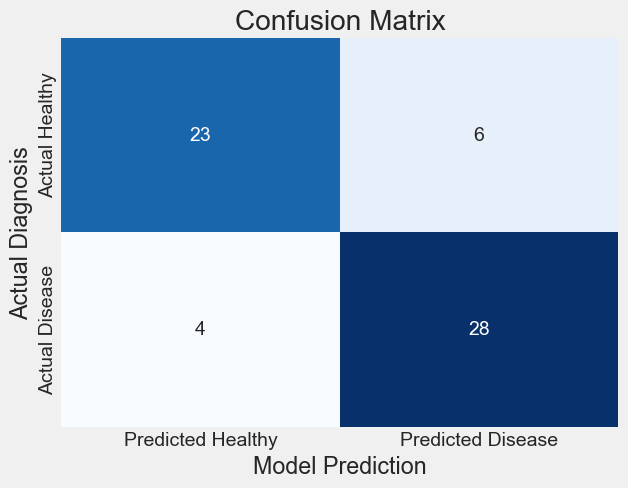

In [30]:
# Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Disease'],
            yticklabels=['Actual Healthy', 'Actual Disease'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Diagnosis')
plt.xlabel('Model Prediction')
plt.show()

### 6. Model Interpretation: Feature Importance
We extracted the **Coefficients** from the Logistic Regression model to understand which symptoms contributed most to the diagnosis.

* **Positive Coefficients (Bars to the Right):** These features **increase** the probability of heart disease.
* **Negative Coefficients (Bars to the Left):** These features **decrease** the probability (protective factors).

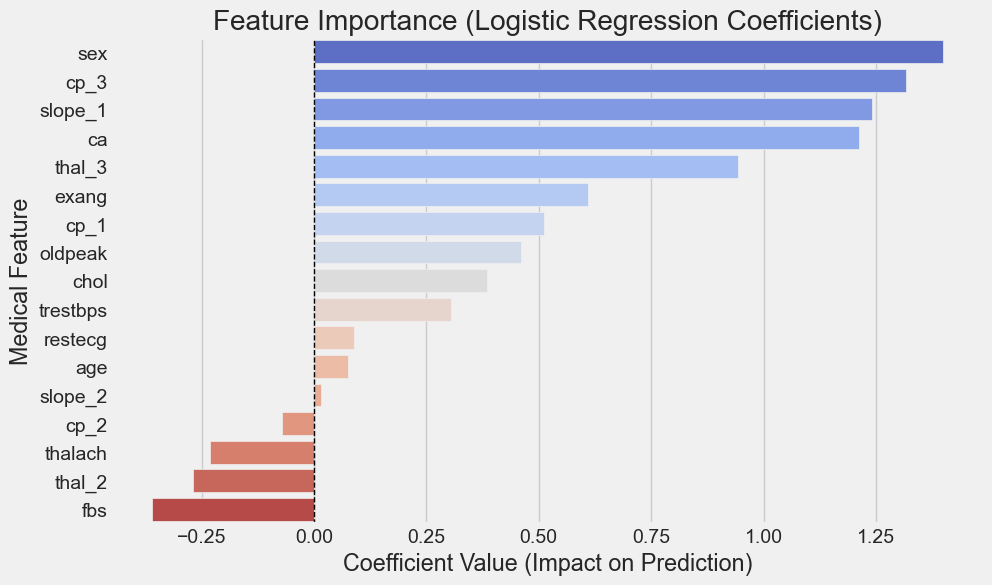

In [31]:
# Getting the coefficients (weights) from the model
coefficients = log_reg.coef_[0]

# Getting the feature names from our X_train data
feature_names = X_train.columns

# 3. Creating a DataFrame to organize them
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sorting them by importance (Absolute value)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualizing
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')

plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value (Impact on Prediction)')
plt.ylabel('Medical Feature')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1) 
plt.show()

### 6. Project Conclusion & Medical Insights

#### Summary of Findings
successfully built a Logistic Regression model that predicts heart disease with approximately **83% accuracy**.
* **Sensitivity (Recall):** The model correctly identified **87.5%** of the sick patients.
* **Precision:** When the model predicted "Disease," it was correct **84%** of the time.

#### Key Medical Drivers (Feature Importance)
Our model identified the following as the strongest predictors of heart disease:

1.  **Coronary Vessels (`ca`):**
    * Patients with **1 or 2 colored vessels** on fluoroscopy had the highest probability of disease. This is medically sound, as visible vessels indicate blockage.
2.  **Asymptomatic Chest Pain (`cp_3`):**
    * Paradoxically, patients reporting **"Asymptomatic"** status were at much higher risk than those reporting typical angina. This highlights the danger of **Silent Ischemia**—patients who don't feel pain may delay treatment.
3.  **Gender (`sex_1`):**
    * Male patients showed a significantly higher baseline risk than female patients in this cohort.
4.  **Flat ST Slope (`slope_1`):**
    * ECG results showing a "Flat" slope during exercise were a strong indicator of heart distress.

#### Recommendations
Based on this data, a "High Risk" profile would be:
> *A Male patient with no chest pain (Asymptomatic) but showing 1+ blocked vessels on a scan and a Flat ST slope during exercise.*

**Clinical Application:**
This model can serve as a **triage tool**. If a patient presents with this profile, they should be prioritized for immediate angiogram or cardiac intervention, even if they claim they "feel fine" (due to the asymptomatic risk).